In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
data = pd.read_csv('E:\python\credit_risk_dataset.csv')

In [3]:
# Data Cleansing
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [4]:
# Data Preprocessing
# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], drop_first=True)

In [5]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [6]:
# Split the dataset into training and testing sets
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Display the preprocessed data
print("Preprocessed Data:")
print(X_train.head())

Preprocessed Data:
       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
32377    5.712903      -0.323881          -0.673420  -0.757573       0.024165   
1338    -0.273252      -0.646554          -1.156213  -0.172315       1.678280   
7047    -0.745843      -0.243213          -0.432024   1.014021       0.647544   
8225    -0.903374      -0.162480           0.292165  -0.567760      -0.966452   
7178    -0.588313       0.208530          -0.432024  -0.409582       0.471640   

       loan_percent_income  cb_person_cred_hist_length  \
32377            -0.657458                    4.487315   
1338              1.496501                   -0.691554   
7047              1.309200                   -0.691554   
8225             -0.563808                   -0.444942   
7178             -0.751109                   -0.691554   

       person_home_ownership_OTHER  person_home_ownership_OWN  \
32377                        False                      False   
1338           

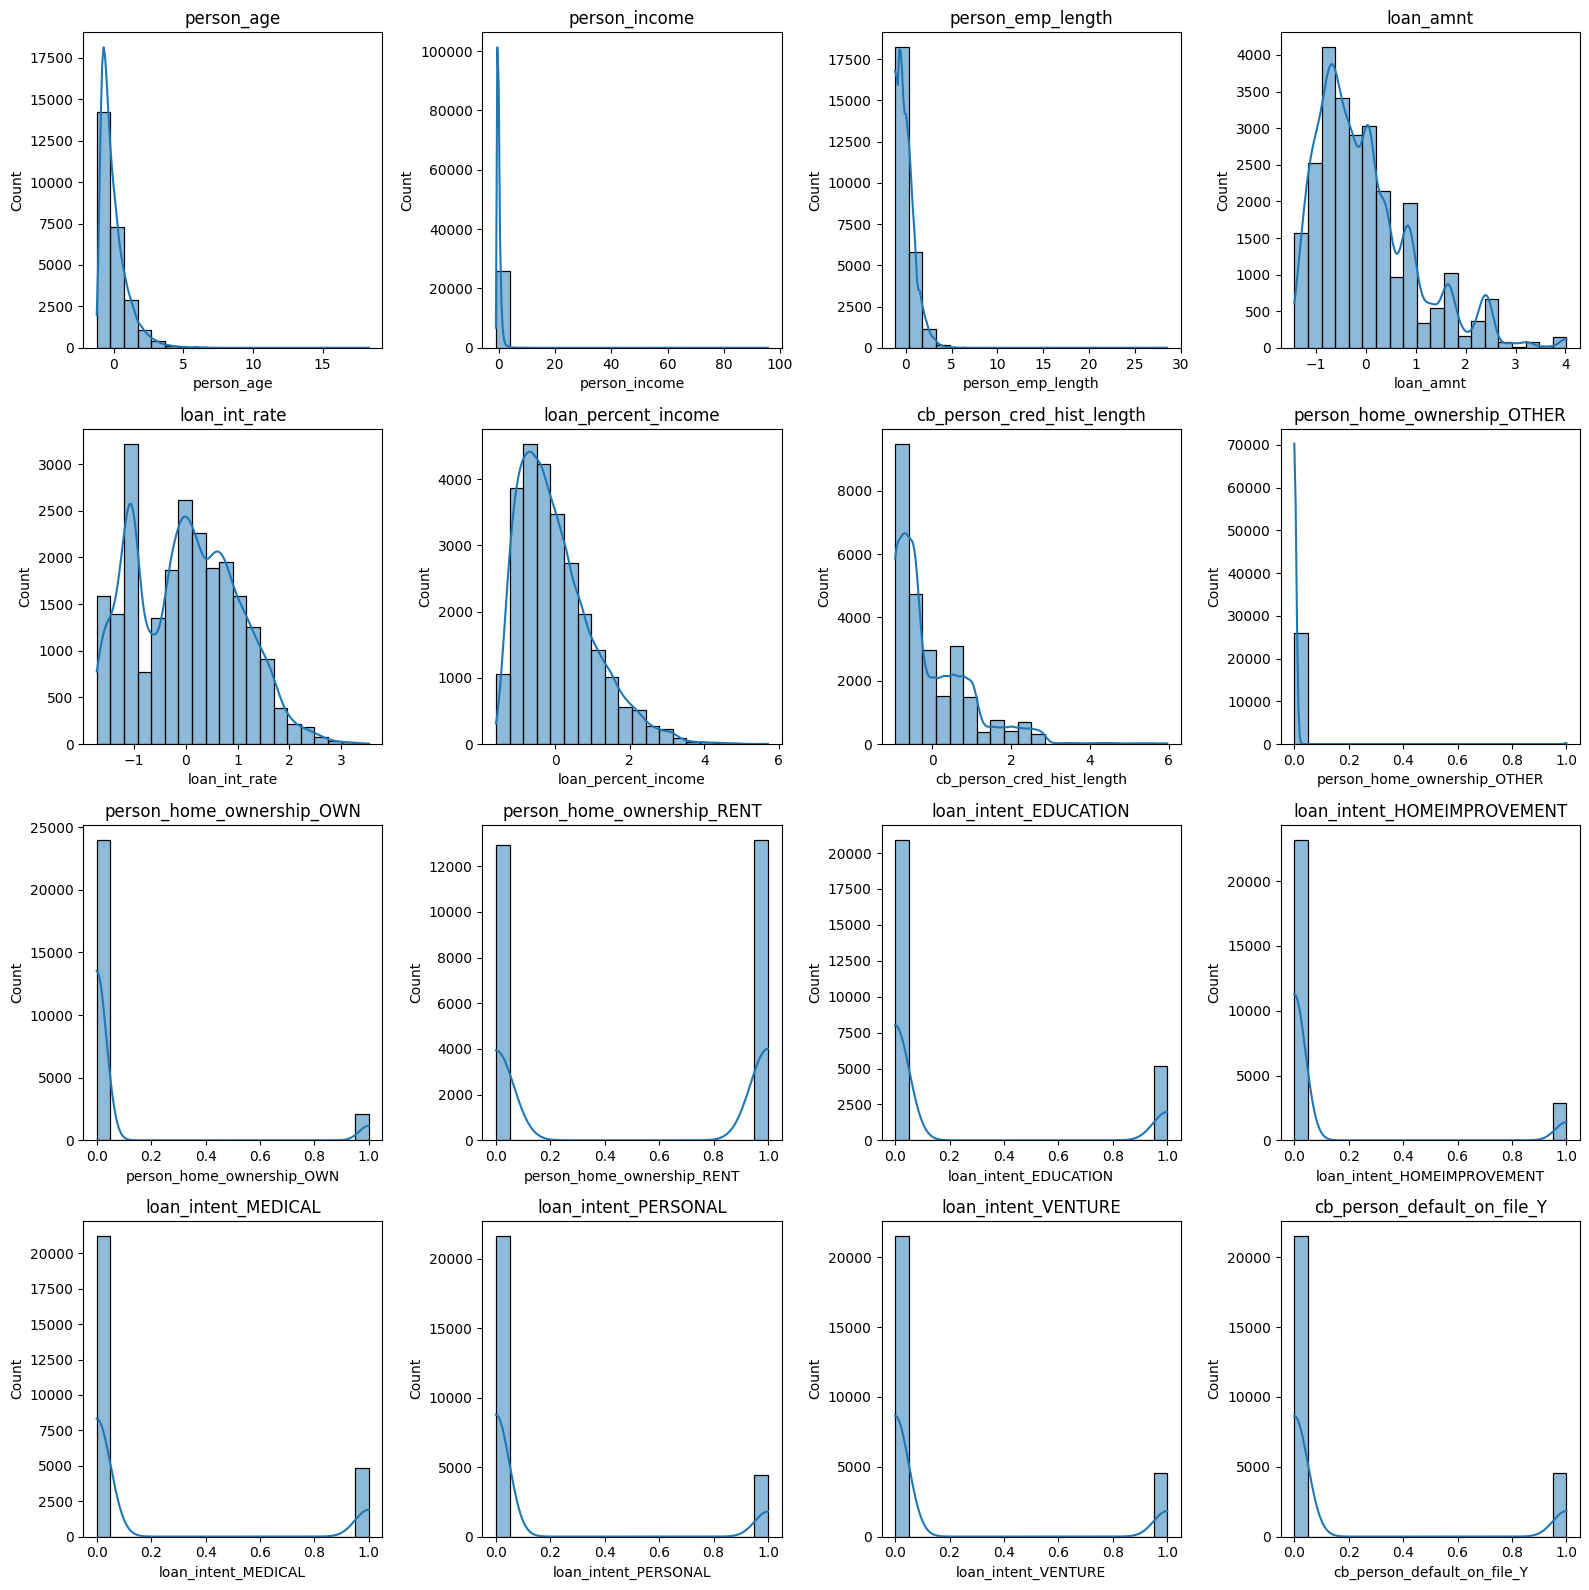

In [8]:
# Exploratory Data Analysis (EDA)
# Explore the distribution of each feature
num_features = X_train.shape[1]  # Number of features
num_rows = (num_features + 3) // 4  # Calculate number of rows
plt.figure(figsize=(16, num_rows * 4))  # Adjust figsize based on number of rows
for i, col in enumerate(X_train.columns):
    plt.subplot(num_rows, 4, i + 1)  # Adjust number of columns
    sns.histplot(X_train[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


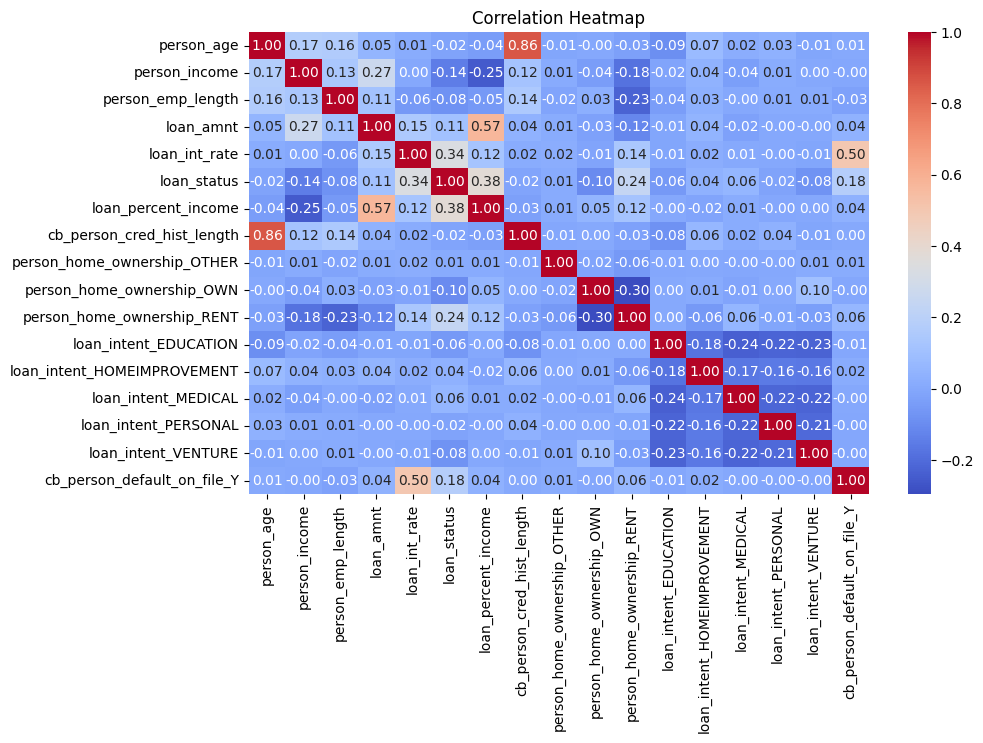

In [9]:
# Analyze correlations between features and the target variable
plt.figure(figsize=(10, 6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [11]:
# Model Development
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Testing Model Accuracy
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

In [13]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [14]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9999616329036218
Testing Accuracy: 0.9176001227558692


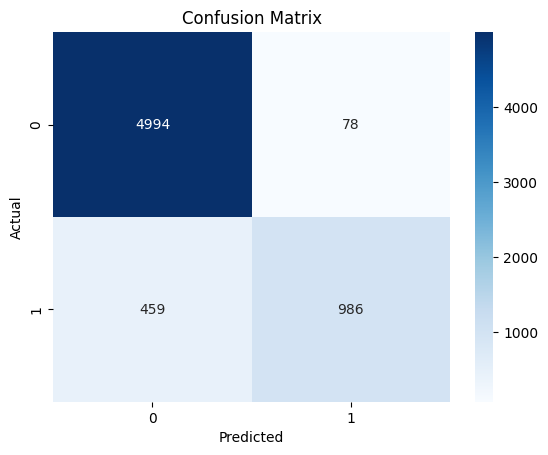

In [15]:
# Visualizing Predictions
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Evaluation of the Model
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5072
           1       0.93      0.68      0.79      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517



In [17]:
# Evaluation of the Model
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5072
           1       0.93      0.68      0.79      1445

    accuracy                           0.92      6517
   macro avg       0.92      0.83      0.87      6517
weighted avg       0.92      0.92      0.91      6517



In [18]:
# Results
print("Results Summary:")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Results Summary:
Training Accuracy: 0.9999616329036218
Testing Accuracy: 0.9176001227558692
Confusion Matrix:
[[4994   78]
 [ 459  986]]


C:\Users\kisho\AppData\Local\Temp\ipykernel_19688\3758532255.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=data_encoded, palette='Set1')


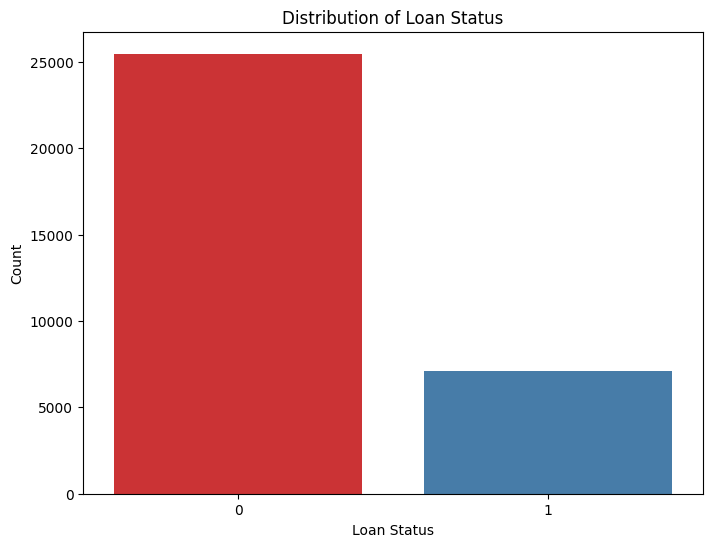

In [19]:
#Distribution of Target Variable (loan_status)

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=data_encoded, palette='Set1')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


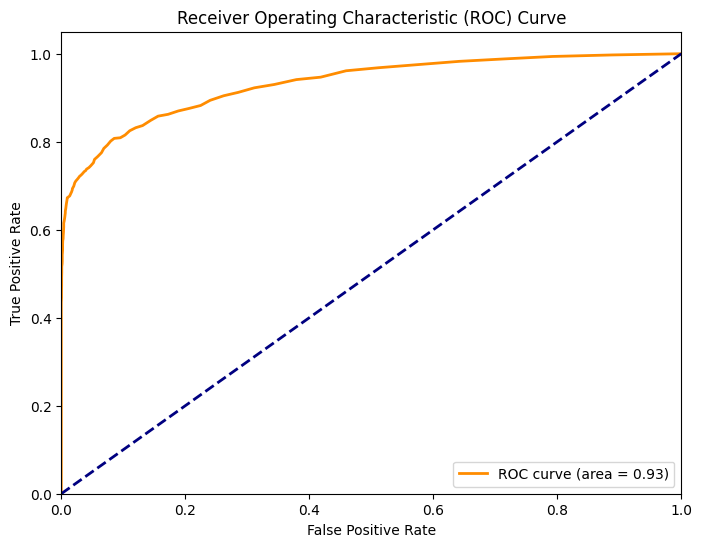

In [21]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

